In [1]:
%matplotlib inline 
#outputs figures one cell below when called
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import sympy as sp 
from sympy import *
from sympy.physics.quantum import TensorProduct
sp.init_printing()


# The Hamiltonian Matrix of a 1+1 system
A system, composed of two subsystems, the Quantum Network (QN) and the Computational Layer (CL), contains 1 reservoir qubits, coupled with eachother, interacting with 1 computational qubits, through quantum tunneling. The general Hamiltonian of the QN of $l$ sites, is given as:
$$
\begin{equation}
\hat{H}_{QN} = \sum_lE_l\hat{a}_l^\dagger\hat{a}_l + \sum_{ll'}K_{ll'}(\hat{a}_l^\dagger\hat{a}_{l'}+ \hat{a}_{l'}^\dagger\hat{a}_l) + \sum_l(P_l^*\hat{a}_l + P_l\hat{a}_l^\dagger)
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:hqn} \tag{1}
\end{equation}
$$


Where $E$ is the onsite energies of the states of the QN qubits. The $K$ terms define the so called hopping terms, which translates the state at one site to the other. Finally, the classical field excitation, $P$, is induced into the QN, which simulates a quantum operation. From $\eqref{eq:hqn}$, we see $H_{QN}$ is hermitian.

For the CL subsystem, the general hermertian Hamiltonian, for the $k^{th}$ qubit acting on $l^{th}$ site, is represented as follows: 
$$
\begin{equation}
\hat{H}_{CL} = \sum_{kl}(J_{kl}^*\hat{\sigma}_k^+\hat{a}_l + J_{kl}\hat{a}_l^\dagger\hat{\sigma}_k^-) 
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:hcn} \tag{2}
\end{equation}
$$

Where the $J$ terms indicate the computational qubits (represented by $k$) entanglement between the QN qubits (represented by $l$). The pauli matrices are given as follows: 

$$
\begin{equation}
\sigma_k^{\pm} = \frac{1}{2}(\sigma_k^x \mp i\sigma_k^y)\newline
\sigma_k^{\pm} = \frac{1}{2}\left(\left(\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right) \mp i\left(\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right)\right)\newline
\end{equation}
$$
where
$$
\begin{equation}
\sigma_k^{-} = \left(\begin{array}{cc}
0 & 1\\
0 & 0
\end{array}\right)\newline
\&\newline
\sigma_k^{+} = \left(\begin{array}{cc}
0 & 0\\
1 & 0
\end{array}\right)
%|\psi_{qb}\rangle $\eqref{eq:hqn}$
\label{eq:pauli} \tag{3}
\end{equation}
$$


where, the basis is taken as:
$$
\begin{equation}
\newline
|g\rangle = \left(\begin{array}{cc}
1\\
0
\end{array}\right)
\&\
|e\rangle = \left(\begin{array}{cc}
0\\
1
\end{array}\right)
\label{eq:adag} \tag{4}
\end{equation}
$$

and the full wavefunction (total hamiltonian follows same property) of an N+N system is:
$$
\begin{equation}
\newline
|\psi\rangle = |Q_{c1}\rangle \otimes |Q_{c2}\rangle \otimes |Q_{c3}\rangle \otimes...|Q_{r1}\rangle \otimes |Q_{r2}\rangle \otimes |Q_{r3}\rangle \otimes ...|Q_{rN}\rangle 
\label{eq:wavefn} \tag{5}
\end{equation}
$$

The total Hamiltonian of our system is then:
$
\begin{equation}
\hat{H} = \sum_lE_l\hat{a}_l^\dagger\hat{a}_l + \sum_{ll'}K_{ll'}(\hat{a}_l^\dagger\hat{a}_{l'}+ \hat{a}_{l'}^\dagger\hat{a}_l) + \sum_l(P_l^*\hat{a}_l + P_l\hat{a}_l^\dagger) + \sum_{kl}(J_{kl}^*\sigma_k^{+}\hat{a}_l + J_{kl}\hat{a}_l^\dagger\sigma_k^{-})
\label{eq:h}
\end{equation}
$

In [2]:
#nomenculture like E01 ground energy of qubit 1 
E11,E01,P1, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
I2 = sp.eye(2)
a_dag = sp.Matrix([[0,0],
                   [1,0]])
sigmap = sp.Matrix([[0,0],[1,0]])
sigmam = sigmap.T

In [3]:
#state of our reservior system 
qr1 = sp.Matrix([[E01,P1.conjugate()],
                 [P1,E11]])
qr1

D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDep

⎡        _____ ⎤
⎢E_{01}  P_{1} ⎥
⎢              ⎥
⎣P_{1}   E_{11}⎦

In [4]:
#hamil of res, if more tensor of all
qrh = qr1

In [5]:
c1 = sp.Matrix([[E_01,0],[0,E_11]])
c1

⎡E_{01c}     0   ⎤
⎢                ⎥
⎣   0     E_{11c}⎦

In [6]:
#hamilt of comp sys
ch = c1

In [7]:
#hamil of total system is thus
Hh = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
Hh

⎡                       _____                                          ⎤
⎢E_{01c} + E_{01}       P_{1}               0                 0        ⎥
⎢                                                                      ⎥
⎢     P_{1}        E_{01c} + E_{11}         0                 0        ⎥
⎢                                                                      ⎥
⎢                                                           _____      ⎥
⎢       0                 0          E_{01} + E_{11c}       P_{1}      ⎥
⎢                                                                      ⎥
⎣       0                 0               P_{1}        E_{11c} + E_{11}⎦

In [8]:
#can edit values here if need be
E01,E_11c, E_01c = (0,0,0)

ch = ch.subs({"E_{11c}":E_11c, "E_{01c}":E_01c})
qrh = qrh.subs({"E_{11}":E11,"E_{01}":E01,"P_{1}":P1})
ch,qrh

⎛        ⎡       _____ ⎤⎞
⎜⎡0  0⎤  ⎢  0    P_{1} ⎥⎟
⎜⎢    ⎥, ⎢             ⎥⎟
⎝⎣0  0⎦  ⎣P_{1}  E_{11}⎦⎠

In [9]:
#just rewritting hamil with zero potential+gnd state
H = TensorProduct(ch,I2) + TensorProduct(I2,qrh)
H

⎡       _____                ⎤
⎢  0    P_{1}     0      0   ⎥
⎢                            ⎥
⎢P_{1}  E_{11}    0      0   ⎥
⎢                            ⎥
⎢                      _____ ⎥
⎢  0      0       0    P_{1} ⎥
⎢                            ⎥
⎣  0      0     P_{1}  E_{11}⎦

In [10]:
#now to introduce coupling 
def MTP(A,B):
    return TensorProduct(A,B)

In [11]:
H = H + J11.conjugate()*(MTP(sigmap,a_dag.T)) + J11 * (MTP(sigmam, a_dag))
H

⎡       _____                 ⎤
⎢  0    P_{1}     0       0   ⎥
⎢                             ⎥
⎢P_{1}  E_{11}  J_{11}    0   ⎥
⎢                             ⎥
⎢       ______          _____ ⎥
⎢  0    J_{11}    0     P_{1} ⎥
⎢                             ⎥
⎣  0      0     P_{1}   E_{11}⎦

## TIME EVOLUTION OPERATOR

In [12]:
E11,E01,P11, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H
E11,P11,J11 = (1,60,2)
H1 = Hcopy.subs({"E_{11}":E11,"P_{1}":P11, "J_{11}":J11})
H1

⎡0   60  0   0 ⎤
⎢              ⎥
⎢60  1   2   0 ⎥
⎢              ⎥
⎢0   2   0   60⎥
⎢              ⎥
⎣0   0   60  1 ⎦

$$
\begin{equation}
U = \exp(\frac{-i\hat{H}\tau}{\hbar})
\label{exp} \tag{6}
\end{equation}
$$

In [13]:
#hbar=1
tauhbar = 0.5

In [14]:
H2 = -1j * H1 * tauhbar
H2

⎡   0     -30.0⋅ⅈ     0        0   ⎤
⎢                                  ⎥
⎢-30.0⋅ⅈ  -0.5⋅ⅈ   -1.0⋅ⅈ      0   ⎥
⎢                                  ⎥
⎢   0     -1.0⋅ⅈ      0     -30.0⋅ⅈ⎥
⎢                                  ⎥
⎣   0        0     -30.0⋅ⅈ  -0.5⋅ⅈ ⎦

In [15]:
P1,D1 = H2.diagonalize()
#P1
K = P1@D1@P1.inv()
P1@D1.exp()@P1.inv()

⎡                    30.2551908103745⋅ⅈ                      29.2552255307877⋅
⎢ 0.247848601100423⋅ℯ                   + 0.256319656506643⋅ℯ                 
⎢                                                                             
⎢                    -30.7551908103745⋅ⅈ                      29.2552255307877
⎢  0.24995689061259⋅ℯ                    - 0.249956311969196⋅ℯ                
⎢                                                                             
⎢                       -29.7552255307877⋅ⅈ                    30.255190810374
⎢   - 0.24784731030785⋅ℯ                    + 0.2520138321454⋅ℯ               
⎢                                                                             
⎢                     -29.7552255307877⋅ⅈ                      29.255225530787
⎣- 0.254156964245947⋅ℯ                    + 0.254156964245947⋅ℯ               

ⅈ                     -30.7551908103745⋅ⅈ                      -29.75522553078
  + 0.24381922273258⋅ℯ                    + 0.25201

In [16]:
Hnp = np.array(K).astype(np.complex128)
Hnp

array([[0.+2.66453526e-15j, 0.-3.00000000e+01j, 0.+2.66453526e-15j,
        0.+8.88178420e-16j],
       [0.-3.00000000e+01j, 0.-5.00000000e-01j, 0.-1.00000000e+00j,
        0.-8.88178420e-16j],
       [0.-3.55271368e-15j, 0.-1.00000000e+00j, 0.+7.10542736e-15j,
        0.-3.00000000e+01j],
       [0.+2.66453526e-15j, 0.+6.21724894e-15j, 0.-3.00000000e+01j,
        0.-5.00000000e-01j]])

In [17]:
#e^(A) = P*exp(D)*P^(-1), where P contains eigenvectors of H and D the
#eigenvalues corresponding to the eigenvectors represented in columns
#of P


E, P = np.linalg.eig(Hnp)
display(E)

array([ 0.00000000e+00+30.25519081j,  1.77635684e-15+29.25522553j,
        3.55271268e-15-30.75519081j, -1.78404790e-15-29.75522553j])

In [18]:
r,c = Hnp.shape
r,c

In [19]:
D = np.zeros((r,c))
for i in range(r):
    D[i,i] = E[i]
D
#y = np.array([[1,2,3],[2,3,4],[1,2,2]])

C:\Users\Rojar\AppData\Local\Temp/ipykernel_29500/2705141118.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  D[i,i] = E[i]


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.77635684e-15,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  3.55271268e-15,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.78404790e-15]])

In [20]:
#np.exp(y)

In [21]:
Pinv = np.linalg.inv(P)
P, D, Pinv

(array([[ 0.49784395+1.76637833e-15j,  0.50628022+0.00000000e+00j,
          0.49378054-2.01147630e-18j, -0.50200849-7.36998236e-16j],
        [-0.50207879-1.76440465e-15j, -0.4937114 -3.78338814e-18j,
          0.50621049+0.00000000e+00j, -0.49791252-7.86042010e-16j],
        [ 0.50621049+0.00000000e+00j, -0.49791252-3.00395492e-15j,
          0.50207879+3.36533575e-15j,  0.4937114 +7.97566403e-17j],
        [-0.49378054+1.81557083e-16j,  0.50200849+2.84659947e-15j,
          0.49784395+3.37227157e-15j,  0.50628022+0.00000000e+00j]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  1.77635684e-15,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  3.55271268e-15,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -1.78404790e-15]]),
 array([[ 0.49784395+6.62068332e-16j, -0.50207879-5.87508332e-16j,
          0.50621049-2.35667837e-15j, -0.

In [22]:
H2

⎡   0     -30.0⋅ⅈ     0        0   ⎤
⎢                                  ⎥
⎢-30.0⋅ⅈ  -0.5⋅ⅈ   -1.0⋅ⅈ      0   ⎥
⎢                                  ⎥
⎢   0     -1.0⋅ⅈ      0     -30.0⋅ⅈ⎥
⎢                                  ⎥
⎣   0        0     -30.0⋅ⅈ  -0.5⋅ⅈ ⎦

In [23]:
#original matrix
Hnp

array([[0.+2.66453526e-15j, 0.-3.00000000e+01j, 0.+2.66453526e-15j,
        0.+8.88178420e-16j],
       [0.-3.00000000e+01j, 0.-5.00000000e-01j, 0.-1.00000000e+00j,
        0.-8.88178420e-16j],
       [0.-3.55271368e-15j, 0.-1.00000000e+00j, 0.+7.10542736e-15j,
        0.-3.00000000e+01j],
       [0.+2.66453526e-15j, 0.+6.21724894e-15j, 0.-3.00000000e+01j,
        0.-5.00000000e-01j]])

In [24]:
P.T.conjugate()

array([[ 0.49784395-1.76637833e-15j, -0.50207879+1.76440465e-15j,
         0.50621049-0.00000000e+00j, -0.49378054-1.81557083e-16j],
       [ 0.50628022-0.00000000e+00j, -0.4937114 +3.78338814e-18j,
        -0.49791252+3.00395492e-15j,  0.50200849-2.84659947e-15j],
       [ 0.49378054+2.01147630e-18j,  0.50621049-0.00000000e+00j,
         0.50207879-3.36533575e-15j,  0.49784395-3.37227157e-15j],
       [-0.50200849+7.36998236e-16j, -0.49791252+7.86042010e-16j,
         0.4937114 -7.97566403e-17j,  0.50628022-0.00000000e+00j]])

In [25]:
#should give Hnp back??

P@D@P.T.conjugate()

array([[ 8.71932412e-16+3.02742363e-47j, -1.92062390e-18+4.90945431e-32j,
         8.75158588e-16-2.62798243e-30j,  1.77824958e-15-7.81376717e-30j],
       [-1.92062390e-18-4.90945431e-32j,  9.01072354e-16-2.61048182e-47j,
         1.77818556e-15-8.06193186e-30j,  9.04796081e-16-2.86167122e-30j],
       [ 8.75158588e-16+2.62798243e-30j,  1.77818556e-15+8.06193186e-30j,
         9.01104365e-16+2.50901169e-46j, -1.92062390e-18-2.96074878e-31j],
       [ 1.77824958e-15+7.81376717e-30j,  9.04796081e-16+2.86167122e-30j,
        -1.92062390e-18+2.96074878e-31j,  8.70912485e-16+2.56282473e-47j]])

In [26]:
#e^(A) = P*exp(D)*P^(-1)
expH = P@np.exp(D)@Pinv
expH

array([[ 0.99180929-4.01644410e-15j, -0.98343977-2.59902256e-15j,
         0.9999676 -4.34690049e-15j,  1.00819765-5.11000249e-16j],
       [-0.98343977+2.45332125e-15j,  0.97514089+4.09341530e-15j,
        -0.99152924+2.76841007e-15j, -0.99968984-1.04780997e-15j],
       [ 0.9999676 -4.64172365e-15j, -0.99152924-2.03315750e-15j,
         1.00819303-4.97976986e-15j,  1.01649077-1.11723112e-15j],
       [ 1.00819765+1.25129279e-15j, -0.99968984-7.93105889e-15j,
         1.01649077+9.59252726e-16j,  1.0248568 +4.90279866e-15j]])

In [27]:
from scipy.linalg import expm

In [28]:
expm(Hnp)

array([[ 0.12610124-0.03967509j,  0.21430633+0.83929159j,
         0.45869144-0.11634179j, -0.02247641-0.08802476j],
       [ 0.21430633+0.83929159j,  0.14496272-0.02956495j,
        -0.01533287-0.06004837j,  0.45831684-0.11780887j],
       [ 0.45869144-0.11634179j, -0.01533287-0.06004837j,
         0.14139095-0.04355315j,  0.21430633+0.83929159j],
       [-0.02247641-0.08802476j,  0.45831684-0.11780887j,
         0.21430633+0.83929159j,  0.1296855 -0.02563799j]])

In [29]:
Hnp

array([[0.+2.66453526e-15j, 0.-3.00000000e+01j, 0.+2.66453526e-15j,
        0.+8.88178420e-16j],
       [0.-3.00000000e+01j, 0.-5.00000000e-01j, 0.-1.00000000e+00j,
        0.-8.88178420e-16j],
       [0.-3.55271368e-15j, 0.-1.00000000e+00j, 0.+7.10542736e-15j,
        0.-3.00000000e+01j],
       [0.+2.66453526e-15j, 0.+6.21724894e-15j, 0.-3.00000000e+01j,
        0.-5.00000000e-01j]])

In [30]:
# = sp.exp(Hcopy)
U = expm(Hnp)
#U.simplify()
U


array([[ 0.12610124-0.03967509j,  0.21430633+0.83929159j,
         0.45869144-0.11634179j, -0.02247641-0.08802476j],
       [ 0.21430633+0.83929159j,  0.14496272-0.02956495j,
        -0.01533287-0.06004837j,  0.45831684-0.11780887j],
       [ 0.45869144-0.11634179j, -0.01533287-0.06004837j,
         0.14139095-0.04355315j,  0.21430633+0.83929159j],
       [-0.02247641-0.08802476j,  0.45831684-0.11780887j,
         0.21430633+0.83929159j,  0.1296855 -0.02563799j]])

In [31]:
#eg state 00, 01, 10, 11
psi1 = np.array([[1],[0],[0],[0]])
psi2 = np.array([[0],[1],[0],[0]])
psi3 = np.array([[0],[0],[1],[0]])
psi4 = np.array([[0],[0],[0],[1]])
#print("00:\n",psi1,"\n01:\n",psi2, "\n10:\n",psi3,"\n11:\n", psi4)
psi1

array([[1],
       [0],
       [0],
       [0]])

In [32]:
psit1 = U@psi1
pho = psit1@psit1.T
np.tensordot(psit1, psit1.T, axes = 0)

array([[[[ 0.01432741-0.01000615j,  0.06032326+0.09733309j,
           0.05322569-0.03286947j, -0.00632669-0.01020828j]]],


       [[[ 0.06032326+0.09733309j, -0.65848316+0.35973099j,
           0.19594516+0.36004309j,  0.0690616 -0.03772853j]]],


       [[[ 0.05322569-0.03286947j,  0.19594516+0.36004309j,
           0.19686243-0.10672997j, -0.0205507 -0.03776126j]]],


       [[[-0.00632669-0.01020828j,  0.0690616 -0.03772853j,
          -0.0205507 -0.03776126j, -0.00724317+0.00395696j]]]])

In [33]:
psit1

array([[ 0.12610124-0.03967509j],
       [ 0.21430633+0.83929159j],
       [ 0.45869144-0.11634179j],
       [-0.02247641-0.08802476j]])

In [34]:
pho

array([[ 0.01432741-0.01000615j,  0.06032326+0.09733309j,
         0.05322569-0.03286947j, -0.00632669-0.01020828j],
       [ 0.06032326+0.09733309j, -0.65848316+0.35973099j,
         0.19594516+0.36004309j,  0.0690616 -0.03772853j],
       [ 0.05322569-0.03286947j,  0.19594516+0.36004309j,
         0.19686243-0.10672997j, -0.0205507 -0.03776126j],
       [-0.00632669-0.01020828j,  0.0690616 -0.03772853j,
        -0.0205507 -0.03776126j, -0.00724317+0.00395696j]])

In [35]:
psit1

array([[ 0.12610124-0.03967509j],
       [ 0.21430633+0.83929159j],
       [ 0.45869144-0.11634179j],
       [-0.02247641-0.08802476j]])

In [36]:
ch, qrh, P11, E11, H2

D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\User\Rojar\Documents\Anaconda\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDep

⎛                                ⎡   0     -30.0⋅ⅈ     0        0   ⎤⎞
⎜        ⎡       _____ ⎤         ⎢                                  ⎥⎟
⎜⎡0  0⎤  ⎢  0    P_{1} ⎥         ⎢-30.0⋅ⅈ  -0.5⋅ⅈ   -1.0⋅ⅈ      0   ⎥⎟
⎜⎢    ⎥, ⎢             ⎥, 60, 1, ⎢                                  ⎥⎟
⎜⎣0  0⎦  ⎣P_{1}  E_{11}⎦         ⎢   0     -1.0⋅ⅈ      0     -30.0⋅ⅈ⎥⎟
⎜                                ⎢                                  ⎥⎟
⎝                                ⎣   0        0     -30.0⋅ⅈ  -0.5⋅ⅈ ⎦⎠

In [37]:
ch_test = np.array(ch).astype('complex128')
qrh_test = np.array(qrh.subs({"E_{11}":E11,"P_{1}":P11})).astype('complex128')
Id = np.identity(2).astype('int')
qrh_test, ch_test

(array([[ 0.+0.j, 60.+0.j],
        [60.+0.j,  1.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]]))

In [38]:
H2

⎡   0     -30.0⋅ⅈ     0        0   ⎤
⎢                                  ⎥
⎢-30.0⋅ⅈ  -0.5⋅ⅈ   -1.0⋅ⅈ      0   ⎥
⎢                                  ⎥
⎢   0     -1.0⋅ⅈ      0     -30.0⋅ⅈ⎥
⎢                                  ⎥
⎣   0        0     -30.0⋅ⅈ  -0.5⋅ⅈ ⎦

In [39]:
Hnp

array([[0.+2.66453526e-15j, 0.-3.00000000e+01j, 0.+2.66453526e-15j,
        0.+8.88178420e-16j],
       [0.-3.00000000e+01j, 0.-5.00000000e-01j, 0.-1.00000000e+00j,
        0.-8.88178420e-16j],
       [0.-3.55271368e-15j, 0.-1.00000000e+00j, 0.+7.10542736e-15j,
        0.-3.00000000e+01j],
       [0.+2.66453526e-15j, 0.+6.21724894e-15j, 0.-3.00000000e+01j,
        0.-5.00000000e-01j]])

In [40]:
#J11.conjugate()*(MTP(sigmap,a_dag.T))
l = J11.conjugate()*np.einsum('ij,kl->ijkl', np.array(sigmap).astype('int'), np.array(a_dag.T).astype('int')) + J11 * np.einsum('ij,kl->ijkl', np.array(sigmam).astype('int'), np.array(a_dag).astype('int'))
l.reshape((4,4))

array([[0, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0]])

In [41]:
h = np.einsum('ij,kl->ijkl', ch_test, Id)
h.reshape((4,4))

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [42]:
g = np.einsum('ij,kl->ijkl',Id,qrh_test)
g.reshape((4,4))

array([[ 0.+0.j, 60.+0.j, 60.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, 60.+0.j, 60.+0.j,  1.+0.j]])

In [43]:
H1

⎡0   60  0   0 ⎤
⎢              ⎥
⎢60  1   2   0 ⎥
⎢              ⎥
⎢0   2   0   60⎥
⎢              ⎥
⎣0   0   60  1 ⎦

In [44]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [45]:
np.einsum('ii', a)

60

In [46]:
np.einsum('ij->i', a)

array([ 10,  35,  60,  85, 110])

In [47]:
H_test = np.einsum('ij,kl->ijkl', ch_test, Id) +  np.einsum('ij,kl->ijkl',Id,qrh_test)
H_test

array([[[[ 0.+0.j, 60.+0.j],
         [60.+0.j,  1.+0.j]],

        [[ 0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j]]],


       [[[ 0.+0.j,  0.+0.j],
         [ 0.+0.j,  0.+0.j]],

        [[ 0.+0.j, 60.+0.j],
         [60.+0.j,  1.+0.j]]]])

In [48]:
pho

array([[ 0.01432741-0.01000615j,  0.06032326+0.09733309j,
         0.05322569-0.03286947j, -0.00632669-0.01020828j],
       [ 0.06032326+0.09733309j, -0.65848316+0.35973099j,
         0.19594516+0.36004309j,  0.0690616 -0.03772853j],
       [ 0.05322569-0.03286947j,  0.19594516+0.36004309j,
         0.19686243-0.10672997j, -0.0205507 -0.03776126j],
       [-0.00632669-0.01020828j,  0.0690616 -0.03772853j,
        -0.0205507 -0.03776126j, -0.00724317+0.00395696j]])

In [49]:
pho.reshape()

TypeError: reshape() takes exactly 1 argument (0 given)

In [ ]:
#tr(H{ijkl}){kl} = \sum_i H{iikl}

trace_comp = np.einsum('ijkl->ik',pho)
trace_comp

In [ ]:
#trying to recreate the full hamiltonians in terms of summs

H_test = np.einsum('ij,kl->ijkl', ch_test, Id) +  np.einsum('ij,kl->ijkl',Id,qrh_test) +J11.conjugate()*np.einsum('ij,kl->ijkl', np.array(sigmap).astype('complex128'), np.array(a_dag.T).astype('complex128')) + J11 * np.einsum('ij,kl->ijkl', np.array(sigmam).astype('complex128'), np.array(a_dag).astype('complex128')) 
H_test
    
        

In [ ]:
H_test.shape

In [ ]:
#referenhce
H1

In [ ]:
H_test.reshape((4,4))

In [ ]:
H_test_U = -1j * H_test * tauhbar
U1 = expm(H_test_U)

In [ ]:
A = np.array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])
np.einsum('ii->', A)

In [ ]:
pho

In [ ]:
np.einsum('iikl->ik',pho.reshape(2,2,2,2))

In [ ]:
#tr(H{ijkl}){kl} = \sum_i H{iikl}

trace_comp = np.einsum('iikl->ik',pho)
trace_comp

# simulation and testing

In [ ]:
# #let us define some t, time scale, as t = E0 * tau/hbar
# #ideally random sample of e0 taken from +-E0/2 where E0 can be defined as 
# #1 for e.g. But let us for now choose e0 = 1/2
# #redefine some terms
# t = 0.00001
# H2 = -1j * np.array(H1).astype('complex128') * t
# #therefore U is
# U = expm(H2)
# H2, U

In [ ]:
#rabii oscillation with qubit itself - happens with any hermitian qubits with itself of two sites
#a signiture of two equal probable levels
#a signitture of transistions from one state to another
#if you start one particle in one state and let it evolve
#and hamiltonian is hermertian then a rabii osciilation 
#

In [ ]:
#reason why they chose K0 as scaling factor, try change to 

In [ ]:
import random
from scipy.linalg import expm

In [ ]:
E11,E01,P11, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H

E0 = 1 #variance of uniform distrib of energies E0 
#-> e11 derived here ->random

E0_array = np.linspace(-E0/2, E0/2, 11)
E11 = 1
P11,J11 = (20/E0,2/E0) #if more than 1 reser need to add K0 term
H1 = Hcopy.subs({"E_{11}":E11,"P_{1}":P11, "J_{11}":J11})
H1


In [ ]:
#e1 chosen from this distrib (and all subsequent energies randomly chosen from
#this distrib
#compu qubit has no onsite V according to paper
#E11 = 0.5 corresponds to first reservior qubit energy

tauhbar = 0.001
dt = E0 * tauhbar
#when more Reservoi qubits scale with K0, E0 itself also scaled with
#K0

H2 = np.array(H1).astype('complex128') / E0 #scaling E0
#therefore U is
U = expm(-1j* H2 * dt)
H2, U

# comparing two basis states

In [2]:
import random
from scipy.linalg import expm

In [3]:

tauhbar = 0.001
dt = E0 * tauhbar
#when more Reservoi qubits scale with K0, E0 itself also scaled with
#K0

H2 = np.array(H1).astype('complex128') / E0 #scaling E0
#therefore U is
U = expm(-1j* H2 * dt)





nsteps = 3000
T = nsteps  * dt
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

a = np.zeros_like(t).astype('complex128')#creates array with same shape/length of t of same
#dtype
b =  np.zeros_like(t).astype('complex128')
c =  np.zeros_like(t).astype('complex128')
d =  np.zeros_like(t).astype('complex128')
#for i in range(len(t))
psi = np.array([[1], [0], [0], [0]])
for i, tval in enumerate(t):
    a[i] = psi[0]
    b[i] = psi[1]
    c[i] = psi[2]
    d[i] = psi[3]
    psi = U @ psi
   

plt.plot(t, np.abs(a)**2, 'b', label = '|00>')
plt.plot(t, np.abs(b)**2, 'g', label = '|01>')
plt.plot(t, np.abs(c)**2, 'b', label = '|10>')
plt.plot(t, np.abs(d)**2, 'g', label = '|11>')
plt.xlabel('Scaled Time')
plt.ylabel(f'|a^2|(blue)    &     |b^2|(green)')
#plt.xlim(1.4,1.8) # to see if it goes zero
# plt.plot(t, np.abs(c)**2, 'y', label = '|10>')
# plt.plot(t, np.abs(d)**2, 'k', label = '|11>')
plt.legend()
plt.savefig('recent.jpg')
plt.show()

NameError: name 'E0' is not defined

In [ ]:
testt = 0.001*np.pi
time = np.arange(0,pi,testt)
time

In [ ]:
plt.rcParams['text.usetex'] = True

In [ ]:
pip install nbconvert

In [ ]:
pip install pylatex

In [13]:
import random
from scipy.linalg import expm

In [14]:
gnd = np.array([[1],[0]])
exc = np.array([[0],[1]])


In [15]:
def partialtrace(rho):
    I = np.eye(2)
    temp = TensorProduct(I,gnd.conjugate().T)@rho@TensorProduct(I,gnd)+(
           TensorProduct(I,exc.conjugate().T)@rho@TensorProduct(I,exc) ) 
    return temp

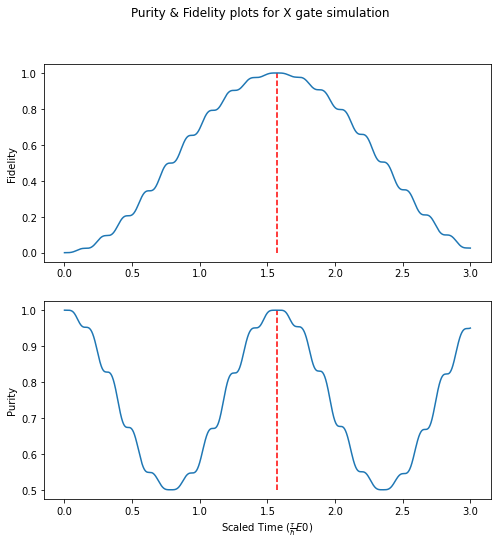

In [16]:
E11,E01,P11, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H

E0 = 1 #variance of uniform distrib of energies E0 
#-> e11 derived here ->random

E0_array = np.linspace(-E0/2, E0/2, 11)
E11 = 1
P11,J11 = (20/E0,2/E0) #if more than 1 reser need to add K0 term
H1 = Hcopy.subs({"E_{11}":E11,"P_{1}":P11, "J_{11}":J11})
H1


tauhbar = 0.001
dt = E0 * tauhbar
#when more Reservoi qubits scale with K0, E0 itself also scaled with
#K0

H2 = np.array(H1).astype('complex128') / E0 #scaling E0
#therefore U is
U = expm(-1j* H2 * dt)





nsteps = 3000
T = nsteps  * dt
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

a = np.zeros_like(t).astype('complex128')#creates array with same shape/length of t of same
#dtype
b =  np.zeros_like(t).astype('complex128')
c =  np.zeros_like(t).astype('complex128')
d =  np.zeros_like(t).astype('complex128')
#for i in range(len(t))
A=1
B=0
phi_in = 1/np.sqrt(np.abs(A)**2+np.abs(B)**2) * (A*gnd + B*exc) 
psi_in = TensorProduct(phi_in,gnd)
psi_in = psi_in / np.linalg.norm(psi_in)
phi_ideal = np.array([[0,1],[1,0]]) @ phi_in

psi_out = {}
psi_out[0] = psi_in

rho = {}
rho[0] = TensorProduct(psi_in, psi_in.conjugate().T)

rho_cq = {}
I = np.eye(2)
rho_cq[0]=TensorProduct(I,gnd.conjugate().T)@rho[0]@TensorProduct(I,gnd)+(
           TensorProduct(I,exc.conjugate().T)@rho[0]@TensorProduct(I,exc) )

F = {}
F[0] = phi_ideal.conjugate().T@rho_cq[0]@phi_ideal
F_array=np.zeros(len(t))
F_array[0] = F[0][0][0].real

purity = {}
purity[0] = np.trace(rho_cq[0]@rho_cq[0])
purity_array=np.zeros(len(t))
purity_array[0] = purity[0].real

for i in range(len(t)-1):
    a[i] = psi_out[i][0]
    b[i] = psi_out[i][1]
    c[i] = psi_out[i][2]
    d[i] = psi_out[i][3]
    psi_out[i+1] = U @ psi_out[i]
    rho[i+1] = TensorProduct(psi_out[i+1], psi_out[i+1].conjugate().T)
    rho_cq[i+1] = partialtrace(rho[i+1])
    F[i+1] = phi_ideal.conjugate().T@rho_cq[i+1]@phi_ideal
    F_array[i+1]=F[i+1][0][0].real
    purity[i+1] = np.trace(rho_cq[i+1]@rho_cq[i+1])
    purity_array[i+1] = purity[i+1].real
    
    
fig,ax = plt.subplots(2, figsize=(8,8))
fig.suptitle('Purity & Fidelity plots for X gate simulation')
ax[0].plot(t, F_array)
ax[0].set_ylabel('Fidelity')
#ax[0].grid()
ax[0].vlines(1.572, 0.0,1.0, linestyles='dashed', colors ='red')
ax[1].plot(t,purity_array)
ax[1].set_ylabel('Purity')
ax[1].set_xlabel(r'Scaled Time ($\frac{\tau}{\hbar}E0$)')
#ax[1].grid()
ax[1].vlines(1.572, 0.5,1.0, linestyles='dashed', colors ='red')
#plt.savefig('purityfid.jpg')
plt.show()

# for i, tval in enumerate(t):
#     a[i] = psi[0]
#     b[i] = psi[1]
#     c[i] = psi[2]
#     d[i] = psi[3]
#     psi = U @ psi
   

# plt.plot(t, np.abs(a)**2, 'b', label = '|00>')
# plt.plot(t, np.abs(b)**2, 'g', label = '|01>')
# plt.plot(t, np.abs(c)**2, 'b', label = '|10>')
# plt.plot(t, np.abs(d)**2, 'g', label = '|11>')
# plt.xlabel('Scaled Time')
# plt.ylabel(f'|a^2|(blue)    &     |b^2|(green)')
# #plt.xlim(1.4,1.8) # to see if it goes zero
# # plt.plot(t, np.abs(c)**2, 'y', label = '|10>')
# # plt.plot(t, np.abs(d)**2, 'k', label = '|11>')
# plt.legend()
# plt.savefig('recent.jpg')
# plt.show()

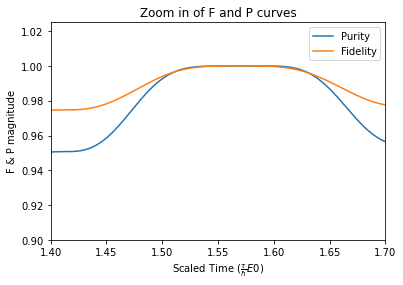

In [23]:
plt.plot(t, purity_array, label="Purity")
plt.plot(t, F_array, label="Fidelity")
plt.xlabel(r"Scaled Time ($\frac{\tau}{\hbar}E0$)")
plt.ylabel(r"F & P magnitude")
plt.title("Zoom in of F and P curves")
plt.legend()
plt.xlim([1.4,1.7])
plt.ylim([0.9,1.025])
#plt.savefig('zoom.jpg')
plt.show()

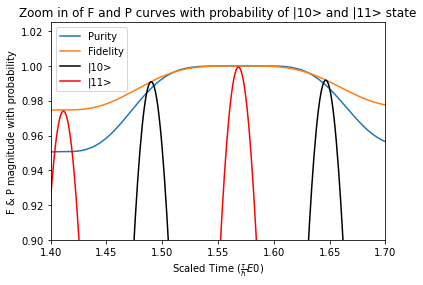

In [86]:
plt.plot(t, purity_array, label="Purity")
plt.plot(t, F_array, label="Fidelity")
#plt.plot(t, np.abs(a)**2, label="|00>")
plt.plot(t, np.abs(c)**2, color='k', label="|10>")
plt.plot(t, np.abs(d)**2,color='r', label="|11>")
plt.xlabel(r"Scaled Time ($\frac{\tau}{\hbar}E0$)")
plt.ylabel(r"F & P magnitude with probability")
plt.title("Zoom in of F and P curves with probability of |10> and |11> state")
plt.legend()
plt.xlim([1.4,1.7])
#plt.xlim([1.50,1.64])
plt.ylim([0.9,1.025])
plt.savefig('zoom1.jpg')
plt.show()

In [98]:
psi_in

array([[0.91914503],
       [0.        ],
       [0.3939193 ],
       [0.        ]])

In [77]:
a.real

array([1.        , 0.99820054, 0.99280865, ..., 0.05339242, 0.05014759,
       0.        ])

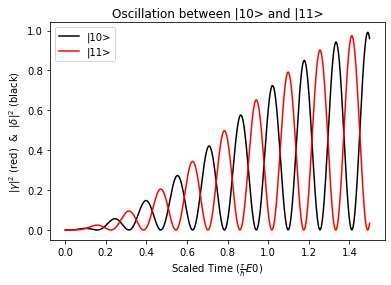

In [79]:
plt.plot(t[:1500],np.abs(c[:1500])**2,color='k', label="|10>")
plt.plot(t[:1500],np.abs(d[:1500])**2,color='r',label="|11>")
plt.xlabel(r'Scaled Time ($\frac{\tau}{\hbar}E0$)')
plt.ylabel(r'$|\gamma|^2$ (red)  &  $|\delta|^2$ (black)')
plt.title('Oscillation between |10> and |11>')
plt.legend()
plt.savefig('relation3.jpg')
plt.show()


In [70]:
t[:1500]

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.497e+00, 1.498e+00,
       1.499e+00])

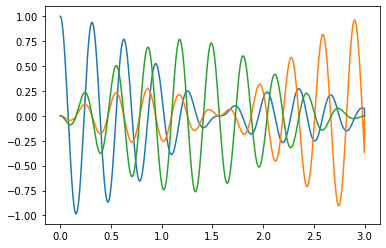

In [18]:
plt.plot(t, a.real, label='|00>')
plt.plot(t, b.real, label='|01>')
plt.plot(t, c.real, label='|10>')


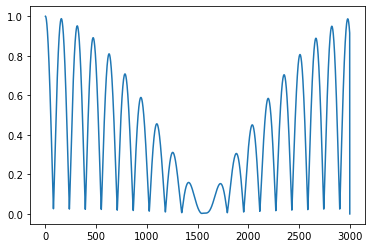

In [21]:
imgaxis=np.linspace(-np.pi,np.pi,11)
realaxis = np.linspace(-np.pi,np.pi,len(a))
real=np.zeros(len(a))
img=np.zeros(len(a))
r = np.zeros(len(a))
for i in range(len(a)):
    real[i]=a[i].real
    img[i]=a[i].imag
    r[i] = np.sqrt(real[i]**2 + img[i]**2)    
plt.plot(r)

C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:20: RuntimeWarning: invalid value encountered in double_scalars
  phaseb[i]=2*np.arctan(b.imag[i]/b.real[i])
C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:21: RuntimeWarning: invalid value encountered in double_scalars
  phasec[i]=2*np.arctan(c.imag[i]/c.real[i])
C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:22: RuntimeWarning: invalid value encountered in double_scalars
  phased[i]=2*np.arctan(d.imag[i]/d.real[i])
C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  za[i] = ra[i]*np.exp(1j*phasea[i])
C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  zb[i] = rb[i]*np.exp(1j*phaseb[i])
C:\Users\Rojar\AppData\Local\Temp/ipykernel_2496/3342902412.py:26: ComplexWarning: Casting complex values to real discards the

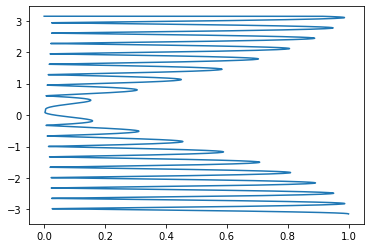

In [19]:
ra = np.zeros(len(a))
rb = np.zeros(len(a))
rc = np.zeros(len(a))
rd = np.zeros(len(a))
phasea = np.zeros(len(a))
phaseb = np.zeros(len(a))
phasec = np.zeros(len(a))
phased = np.zeros(len(a))
za = np.zeros(len(a))
zb = np.zeros(len(a))
zc = np.zeros(len(a))
zd = np.zeros(len(a))
for i in range(len(a)):
    ra[i] = np.sqrt(a.real[i]**2 + a.imag[i]**2)
    rb[i] = np.sqrt(b.real[i]**2 + b.imag[i]**2)
    rc[i] = np.sqrt(c.real[i]**2 + c.imag[i]**2)
    rd[i] = np.sqrt(d.real[i]**2 + d.imag[i]**2)
    
    phasea[i]=2*np.arctan(a.imag[i]/a.real[i])
    phaseb[i]=2*np.arctan(b.imag[i]/b.real[i])
    phasec[i]=2*np.arctan(c.imag[i]/c.real[i])
    phased[i]=2*np.arctan(d.imag[i]/d.real[i])
    
    za[i] = ra[i]*np.exp(1j*phasea[i])
    zb[i] = rb[i]*np.exp(1j*phaseb[i])
    zc[i] = rc[i]*np.exp(1j*phasec[i])
    zd[i] = rd[i]*np.exp(1j*phased[i])
imgaxis=np.linspace(-np.pi,np.pi,len(a))
plt.plot(ra,imgaxis)

In [17]:
a.real

array([1.        , 0.99980001, 0.99920011, ..., 0.07530406, 0.07478874,
       0.        ])

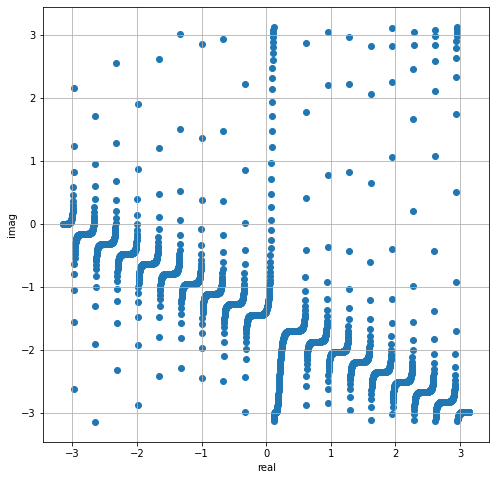

In [22]:
fig=plt.figure(figsize=(8,8))
plt.scatter(realaxis, phasea)
plt.grid()
plt.xlabel('real')
plt.ylabel('radians')
plt.show()

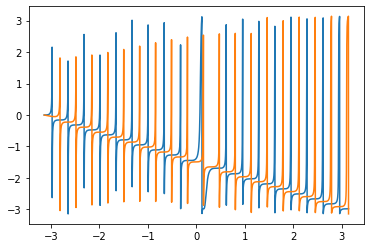

In [30]:
plt.plot(realaxis, phasea)
#plt.plot(realaxis, phaseb)
plt.plot(realaxis, phasec)
#plt.plot(realaxis, phased)

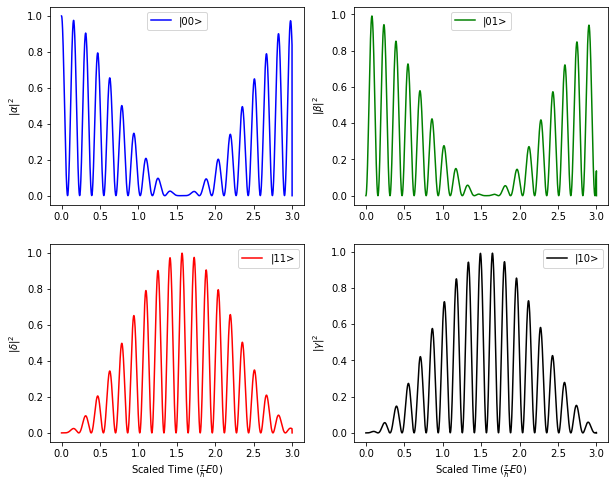

In [28]:
fig,ax=plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(t,np.abs(a)**2,color='b', label="|00>" )
ax[0,0].set_ylabel(r'$|\alpha|^2$')
ax[0,0].legend()
ax[0,1].plot(t,np.abs(b)**2,color='g', label="|01>" )
ax[0,1].set_ylabel(r'$|\beta|^2$')
ax[0,1].legend()
ax[1,0].plot(t,np.abs(d)**2,color='r', label="|11>" )
ax[1,0].set_ylabel(r'$|\delta|^2$')
ax[1,0].set_xlabel(r'Scaled Time ($\frac{\tau}{\hbar}E0$)')
ax[1,0].legend()
ax[1,1].plot(t,np.abs(c)**2,color='k', label="|10>" )
ax[1,1].set_ylabel(r'$|\gamma|^2$')
ax[1,1].set_xlabel(r'Scaled Time ($\frac{\tau}{\hbar}E0$)')
ax[1,1].legend()
plt.savefig('updatedrabbi.jpg')
plt.show()

In [ ]:
purity[500].real

In [ ]:
l=F.values()

In [ ]:
purity[500]

In [ ]:
F = {}
F[0] = phi_ideal.conjugate().T@rho_cq[0]@phi_ideal
F[0]

In [ ]:
partialtrace(rho[0])

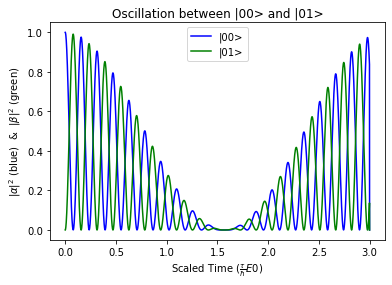

In [27]:
plt.plot(t,np.abs(a)**2,color='b', label="|00>")
plt.plot(t,np.abs(b)**2,color='g',label="|01>")
plt.xlabel(r'Scaled Time ($\frac{\tau}{\hbar}E0$)')
plt.ylabel(r'$|\alpha|^2$ (blue)  &  $|\beta|^2$ (green)')
plt.title('Oscillation between |00> and |01>')
plt.legend()
plt.savefig('relation5.jpg')
plt.show()


In [ ]:

rho = {}
rho[0] = TensorProduct(psi_in, psi_in.conjugate().T)
rho[0]

In [ ]:
psi_out = {}
psi_out[0] = psi_in
psi_out[0][0]

In [ ]:
phi_ideal = np.array([[0,1],[1,0]]) @ phi_in
phi_ideal

In [ ]:
k=np.array([[2],[3]])
z=np.linalg.norm(k)
z

In [ ]:
#we see amp reducing, 

# comparing 4 basis states 

In [ ]:
nsteps = 3000
T = nsteps  * dt 
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

a = np.zeros_like(t).astype('complex128')#creates array with same shape/length of t of same
#dtype
b =  np.zeros_like(t).astype('complex128')
c =  np.zeros_like(t).astype('complex128')
d =  np.zeros_like(t).astype('complex128')
psi = np.array([[1], [0], [0], [0]]) #intial 00 state
for i in range(len(t)):
    a[i] = psi[0]
    b[i] = psi[1]
    c[i] = psi[2]
    d[i] = psi[3]
    #print(psi)
    psi = U @ psi

fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.tight_layout(pad=2.0)
fig.suptitle('Evolution of states with time')
axs[0,0].plot(t, np.abs(a)**2, 'b', label = '|00>')
#axs[0,0].set_xlabel('test')
axs[0,0].set_ylabel(f'|a^2|')
axs[0,0].legend()
#axs[0,0].set_title('prob distribution of state |00>')
axs[0,1].plot(t, np.abs(b)**2, 'g', label = '|01>')
axs[0,1].set_ylabel(f'|b^2|')
axs[0,1].legend()
axs[1,0].plot(t, np.abs(c)**2, 'y', label = '|10>')
axs[1,0].set_ylabel(f'|c^2|')
axs[1,0].set_xlabel(f'Scaled Time')
axs[1,0].legend()
axs[1,1].plot(t, np.abs(d)**2, 'k', label = '|11>')
axs[1,1].set_ylabel(f'|d^2|')
axs[1,1].set_xlabel(f'Scaled Time')
axs[1,1].legend()

# for ax in axs.flat:
#     ax.set(xlabel='Time', ylabel='Complex # squared')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
plt.savefig('recent1.jpg')

In [ ]:
nsteps = 2500
T = nsteps  * dt 
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

a = np.zeros_like(t).astype('complex128')#creates array with same shape/length of t of same
#dtype
b =  np.zeros_like(t).astype('complex128')
c =  np.zeros_like(t).astype('complex128')
d =  np.zeros_like(t).astype('complex128')
psi = np.array([[1], [0], [0], [0]]) #intial 00 state
for i in range(len(t)):
    a[i] = psi[0]
    b[i] = psi[1]
    c[i] = psi[2]
    d[i] = psi[3]
    #print(psi)
    psi = U @ psi

fig, axs = plt.subplots(2,2)
#axs[0,0].plot(t, np.abs(a)**2, 'b', label = '|00>')
#axs[0,0].legend()
#axs[0,0].set_title('prob distribution of state |00>')
#axs[0,1].plot(t, np.abs(b)**2,t, np.abs(d)**2, 'g', label = '|01>')
#axs[0,1].legend()
axs[1,0].plot(t, np.abs(c)**2,t, np.abs(d)**2, 'y', label = '|10>')
axs[1,0].legend()
#axs[1,1].plot(t, np.abs(d)**2, 'k', label = '|11>')
#axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Complex # squared')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
#plt.savefig('1_1withintialstate_00.jpg')

# now lets work out partial trace

In [ ]:
psi

In [ ]:
norm = np.linalg.norm(psi)
psi_norm = psi/norm
norm

In [ ]:
pho = TensorProduct(psi_norm,psi_norm.T)
pho

In [ ]:
pho.conjugate().T #hermertian check

In [ ]:
Id =np.eye(2)
Id

In [ ]:
psi = 1/np.sqrt(2) (TensorProduct(exc_state, exc_state) + TensorProduct(gnd_state, gnd_state))

In [ ]:
#subsystem A = computational site & subsystem B = Reservoir site
gnd_state = np.array([[1],[0]])
exc_state = np.array([[0],[1]])
pho_A = TensorProduct(Id, gnd_state.T)@pho@TensorProduct(Id, gnd_state) + TensorProduct(Id, exc_state.T)@pho@TensorProduct(Id, exc_state)
pho_B = TensorProduct(gnd_state.T,Id)@pho@TensorProduct(gnd_state,Id) + TensorProduct(exc_state.T,Id)@pho@TensorProduct(exc_state,Id)
pho_A, pho_B

In [ ]:
psi = 1/np.sqrt(2)*(TensorProduct(exc_state, exc_state) + TensorProduct(gnd_state, gnd_state))
psi
pho = TensorProduct(psi, psi.conjugate().T)
pho_A = TensorProduct(Id, gnd_state.T)@pho@TensorProduct(Id, gnd_state) + TensorProduct(Id, exc_state.T)@pho@TensorProduct(Id, exc_state)
pho_B = TensorProduct(gnd_state.T,Id)@pho@TensorProduct(gnd_state,Id) + TensorProduct(exc_state.T,Id)@pho@TensorProduct(exc_state,Id)
pho_A, pho_B

In [ ]:
#maximally mixed state no transitions

In [ ]:
state = 1/np.sqrt(2) *(gnd_state + exc_state)
pho1= TensorProduct(state,state.conjugate().T)
pho1
pho_A1 = TensorProduct(Id, gnd_state.T)@pho@TensorProduct(Id, gnd_state) + TensorProduct(Id, exc_state.T)@pho@TensorProduct(Id, exc_state)
pho1,pho_A1#maximally mixed 1/2<1, for 50% |0>, |1>

In [ ]:
#rhs input state and lhs the output -> think like 
#probabilty from going right to left

coherence "transistion" probability
$$
\begin{equation}
\newline
|\langle0|\rho_{A=cq}|0\rangle|^2\newline
|\langle0|\rho_{A=cq}|1\rangle|^2\newline
|\langle1|\rho_{A=cq}|0\rangle|^2\newline
|\langle1|\rho_{A=cq}|1\rangle|^2
\label{eq:transistions} \tag{7}
\end{equation}
$$

In [ ]:
zerozero = gnd_state.T@pho_A@gnd_state
zerozero, np.abs(zerozero)**2

# decoherence
consider we prepare pure state
\begin{equation}
|+\rangle, \hspace{0.5cm}basis\hspace{0.25cm}\epsilon\hspace{0.25cm}[|0\rangle,|1\rangle]\\
\rho = \frac{1}{2}\left(\begin{array}{cc}
1 & 1\\
1 & 1
\end{array}\right)
\end{equation}


now lets consider time evolution of |+>, that is
\begin{equation}
|+\rangle = \frac{1}{\sqrt{2}} (|0\rangle+|1\rangle) -> \frac{1}{\sqrt{2}} (|0\rangle+e^{i\omega t}|1\rangle)
\end{equation}

\begin{equation}
\rho(t) = \frac{1}{2}\left(\begin{array}{cc}
1 & e^{i\omega t}\\
e^{-i\omega t} & 1
\end{array}\right)
\end{equation}

"size" or "population" in state |+> given by expectation:
\begin{equation}
\langle+|\rho(t)|+\rangle= \frac{1}{2} + \frac{1}{2}cos(\omega t)
\end{equation}
and oscillation is due to off diag terms in $\rho(t)$ and we call it the coherence of the system

https://phys.libretexts.org/@api/deki/files/37646/Screen_Shot_2021-11-24_at_8.03.53_AM.png?revision=1&size=bestfit&width=602&height=380

In [ ]:
xs = np.linspace(0, 35, 1000)

omega = 1
ys_dotted = np.cos(xs * omega) *0.5 +0.5
ys_line = np.cos(xs * omega) * np.linspace(1, 0, 1000)*0.5+0.5

fig, ax = plt.subplots(1, 1)
plt.plot(xs, ys_dotted, linestyle='--')
plt.plot(xs, ys_line)
plt.show()

real systems, coherence decays exponentually at rate gamma
\begin{equation}
\rho(t) = \frac{1}{2}\left(\begin{array}{cc}
1 & e^{i\omega t-\gamma t}\\
e^{-i\omega t -\gamma t} & 1
\end{array}\right)
\end{equation}
and
\begin{equation}
\langle+|\rho(t)|+\rangle= \frac{1}{2} + \frac{e^{-\gamma t}}{2}cos(\omega t)
\end{equation}
this is the decoherence of systm and gamma depends on physical mechanism that leads to such decoherence

# let us try and make a 3D plot with say array of P values and see what happens

In [ ]:
H

In [ ]:
E11,E01,P11_array, E_11, E_01, J11 = sp.symbols("E_{11} E_{01} P_{1} E_{11c} E_{01c} J_{11}")
Hcopy = H

E0 = 1 #variance of uniform distrib of energies E0 
#-> e11 derived here ->random

E11 = float(-E0/2 +(np.random.rand(1)*E0))
#E11 = 2
P11_array = np.linspace(1, 100, 50) / E0 #just adding some testing values
J11 = 2 #if more than 1 reservoir site, need to add K0 term
list1={}
for i in range(len(P11_array)):
    list1["H_{0}".format(i)] = np.array(Hcopy.subs({"E_{11}":E11,"P_{1}":P11_array[i], "J_{11}":J11})).astype('complex128') * 1/E0
list1["H_3"], P11_array

In [ ]:
#np.random.rand(1) #only get val from 0,1 from (-E0/2, +E0/2)
E11 = -E0/2 +(np.random.rand(1)*E0)
E11

In [ ]:
tauhbar = 0.01
dt = E0 * tauhbar

list2 = {}
for i in range(len(P11_array)):
    list2["U_{0}".format(i)] = expm(-1j* list1["H_{0}".format(i)] * dt)
list2["U_2"]

In [ ]:
import numpy as np 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [ ]:
z=np.zeros((len(t), len(P11_array)))
z.T

In [ ]:
%matplotlib notebook 

In [ ]:
nsteps = 300
T = nsteps  * dt 
t = np.arange(0, T+dt, dt) #creates array from 0 to T +dt in steps of dt

a = np.zeros_like(t).astype('complex128')#creates array with same shape/length of t of same
#dtype
b =  np.zeros_like(t).astype('complex128')
c =  np.zeros_like(t).astype('complex128')
d =  np.zeros_like(t).astype('complex128')
psi = np.array([[1], [0], [0], [0]]) #intial 00 state
Z=np.zeros((len(t), len(P11_array)))
for j in range(len(P11_array)):
    for i in range(len(t)):
        a[i] = psi[0]
        b[i] = psi[1]
        c[i] = psi[2]
        d[i] = psi[3]
        #print(psi)
        psi = list2["U_{0}".format(j)] @ psi
        Z[i,j] = np.abs(psi[0])**2

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(t,P11_array)

surf = ax.plot_surface(X,Y,Z.T)
ax.set_aspect('auto')
ax.set_xlabel('time')
ax.set_ylabel('P11 values')
ax.set_zlabel('Amplitude')

#fig.colorbar(surf, shrink = 0.5, aspect = 8)

plt.show()

#plt.savefig('1_1withintialstate_00.jpg')

In [ ]:
Z

In [ ]:
plt.imshow(Z, cmap='viridis', interpolation='bicubic')
plt.show()

In [ ]:
len(P11_array),len(t)

In [ ]:

n = 4

# create an nxn numpy array
a = np.reshape(np.linspace(0,1,n**2), (n,n))
shape(a)

In [ ]:
P11_array

In [ ]:
t

In [ ]:
shape(Z)

In [ ]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

In [ ]:
#plt.rcParams['text.usetex'] = True

In [ ]:
fig, ax = plt.subplots()
#ax.set_aspect('auto')
#plt.imshow(Z.T, cmap='bwr', interpolation='bicubic')
pos = ax.imshow(Z.T, cmap='bwr', interpolation='bicubic', extent=[t[0],t[-1],P11_array[-1],P11_array[0]])
ax.invert_yaxis()
forceAspect(ax,aspect=1)
cbar = plt.colorbar(pos)
ax.set_xlabel('scaled time (tau/hbar)')
ax.set_ylabel('P11 values')
cbar.set_label(r'|a|^2')
plt.show()

In [ ]:
shape(X), shape(Y),shape(Z)

In [ ]:
import matplotlib
matplotlib.__version__

In [ ]:
np.random.uniform(-1, 1, (1,1)) + 1.j * np.random.uniform(-1, 1, (1,1))

In [ ]:
n = 4
a = np.reshape(np.linspace(0,1,n**2), (n,n))

plt.imshow(a, cmap = 'viridis', interpolation='bicubic', aspect='auto')
ax.auto_scale_xyz
#ax.axis('auto')
plt.yticks([])
plt.xticks(range(n))
plt.title('Viridis color map, bicubic blending', y=1.02, fontsize=12)

plt.show()

In [ ]:
#what t/h (+) K  is and what scaling is

In [ ]:
#rabi cycle or oscillation, cos/sin squared locus represents

In [ ]:
#change P, J , E0, 

In [ ]:
#3D plot, Y axis P or J, X and Z time and prob. Create array of say P
#and keep J constant

In [ ]:
psi1n = psi1 / np.linalg.norm(psi1)
psi2n = psi2 / np.linalg.norm(psi2)
psi3n = psi3 / np.linalg.norm(psi3)
psi4n = psi4 / np.linalg.norm(psi4)
psitotal = psi1n+psi2n+psi3n+psi4n

In [ ]:
A = np.array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44]])
B = np.array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])
np.einsum('ij,jk -> ik', A,B) #ie matrix multi
np.einsum('ii -> i', A) #extract diag
np.einsum('ij, ij -> ij', A, B) #hadamard product, or elementwise
np.einsum('ij, ij -> ij', A,A) #element wise square
np.einsum('ii -> ', A)#adds diag ie trace
np.einsum('ij ->ji', A)#transpose
np.einsum('ij, ji -> ij', A,B)

In [ ]:
pho = psitotal * psitotal.T
pho

In [ ]:
#lets consider 00 and 10-psi3
#psi_initial tensor with psi_vaccuum_QN
psi_vacuum_QN = np.array([[0],[0],[0],[0]])
psi_out = U*TensorProduct(psi1,psi_vacuum_QN)
psi_out

In [ ]:
U

In [ ]:
#another idea

In [ ]:
psi_qn = np.array([[1],[0]]) # |g>
psi_comp1 = np.array([[0], [1]]) #|e>
psi_comp2 = np.array([[1],[0]]) # |g>

psi_out = U * TensorProduct(psi_comp1, psi_qn)
psi_out

In [ ]:
pho = psi_out * psi_out.T
pho

In [ ]:
#U_dagU = I
#TensorProduct(U.T, U)

In [ ]:
U.norm()

In [ ]:
#D = 1/U.norm() * U
#D

In [ ]:
#U_dagU = I
#TensorProduct(D.T, D)

In [ ]:
#gnd state 
psi_initial = sp.Matrix([[1],[0]])

In [ ]:
#N = 
psi_initial.norm()

In [ ]:
# v = (1/N, 0/N)
d = 1/psi_initial.norm()* psi_initial.normalized()
d

In [ ]:
psi_initial.is_normalized

In [ ]:
psi1 = U*psi_initial
psi1


In [ ]:
#evolving state
t = 2000/tauhbar #how many steps/iterations of psi, 10 in this case
for j in range(t):
    